In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import cartopy
import pickle
import xarray as xr
from matplotlib import colors
from matplotlib.gridspec import GridSpec
import matplotlib as mpl
from scipy.stats import pearsonr

In [2]:
mpl.__version__

'3.5.3'

In [3]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Pr

In [5]:
variable = 'pr'
eof_start = 1979
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-False-month-True-unforced-False-joint-False', 'rb') as pfile:
    solver_list_month = pickle.load(pfile)
variable = 'pr'
eof_start = 1979
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-False-month-False-unforced-False-joint-False', 'rb') as pfile:
    solver_list = pickle.load(pfile)

In [27]:
variable = 'pr'
eof_start = 1979
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-True-unforced-False-joint-False', 'rb') as pfile:
    solver_list_month_stand = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-False-unforced-False-joint-False', 'rb') as pfile:
    solver_list_stand = pickle.load(pfile)

In [32]:
variable = 'pr'
eof_start = 1979
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-True-unforced-True-joint-False', 'rb') as pfile:
    solver_list_month_unforced = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-False-unforced-True-joint-False', 'rb') as pfile:
    solver_list_unforced = pickle.load(pfile)

In [7]:
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/pr-metrics-stand-False-month-False-unforced-False-joint-False', 'rb') as pfile:
    metrics_mswep = pickle.load(pfile)
mswep_pc = metrics_mswep['obs_pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/GPCP/pr-metrics-stand-False-month-False-unforced-False-joint-False', 'rb') as pfile:
    metrics_gpcp = pickle.load(pfile)
gpcp_pc = metrics_gpcp['obs_pc']
pc1 = metrics_gpcp['pc']
pc2 = metrics_mswep['pc']

In [8]:
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/pr-metrics-stand-False-month-True-unforced-False-joint-False', 'rb') as pfile:
    metrics_mswep_month = pickle.load(pfile)
mswep_pc_month = metrics_mswep_month['obs_pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/GPCP/pr-metrics-stand-False-month-True-unforced-False-joint-False', 'rb') as pfile:
    metrics_gpcp_month = pickle.load(pfile)
gpcp_pc_month = metrics_gpcp_month['obs_pc']
pc1_month = metrics_gpcp_month['pc']
pc2_month = metrics_mswep_month['pc']

In [71]:
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/GPCP/pr-metrics-stand-True-month-True-unforced-False-joint-False', 'rb') as pfile:
    metrics_gpcp_month_stand = pickle.load(pfile)
pc1_month_stand = metrics_gpcp_month_stand['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/GPCP/pr-metrics-stand-True-month-False-unforced-False-joint-False', 'rb') as pfile:
    metrics_gpcp_stand = pickle.load(pfile)
pc1_stand = metrics_gpcp_stand['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/GPCP/pr-metrics-stand-True-month-False-unforced-True-joint-False', 'rb') as pfile:
    metrics_gpcp_unforced = pickle.load(pfile)
pc1_unforced = metrics_gpcp_unforced['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/GPCP/pr-metrics-stand-True-month-True-unforced-True-joint-False', 'rb') as pfile:
    metrics_gpcp_month_unforced = pickle.load(pfile)
pc1_month_unforced = metrics_gpcp_month_unforced['pc']

In [9]:
pc1.time.data[0]

cftime.DatetimeNoLeap(1983, 1, 16, 12, 0, 0, 0, has_year_zero=True)

In [16]:
pc1_month.time.data[0]
pc1_time = pc1_month.indexes['time'].to_datetimeindex()

/var/tmp/shiduan/ipykernel_2328498/1682522768.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  pc1_time = pc1_month.indexes['time'].to_datetimeindex()


In [19]:
def plot_eofs(solver_list_month, solver_list, column, fig, gs, norm, cmap='BrGn'):
    eof_all = None
    for i in range(6):
        eof = solver_list_month[i].eofs().isel(mode=0).transpose('lat', 'lon')
        variance = str(solver_list_month[i].varianceFraction().data[0].round(2))
        ax = fig.add_subplot(gs[i, column], projection=cartopy.crs.Robinson(central_longitude=180))
        ax.contourf(eof.lon, eof.lat, eof, transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
        ax.set_title(months[i]+' '+variance, 
                    fontsize=12)
        ax.add_feature(cartopy.feature.COASTLINE, alpha=.5)
        if eof_all is None:
            eof_all = eof.data
        else:
            eof_all+=eof.data
    for i in range(6, 12):
        eof = solver_list_month[i].eofs().isel(mode=0).transpose('lat', 'lon')
        variance = str(solver_list_month[i].varianceFraction().data[0].round(2))
        ax = fig.add_subplot(gs[11-i, column+1], projection=cartopy.crs.Robinson(central_longitude=180))
        ax.contourf(eof.lon, eof.lat, eof, transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
        ax.set_title(months[i]+' '+variance, 
                    fontsize=12)
        ax.add_feature(cartopy.feature.COASTLINE, alpha=.5)
        if eof_all is None:
            eof_all = eof.data
        else:
            eof_all+=eof.data
    ax = fig.add_subplot(gs[6, column:column+2], projection=cartopy.crs.Robinson(central_longitude=180))
    ax.add_feature(cartopy.feature.COASTLINE, alpha=.5)
    ax.contourf(eof.lon, eof.lat, eof_all/12, transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
    ax.set_title('Mean EOF')

    ax = fig.add_subplot(gs[7, column:column+2], projection=cartopy.crs.Robinson(central_longitude=180))
    eof = solver_list[0].eofs().isel(mode=0).transpose('lat', 'lon')
    variance = str(solver_list[0].varianceFraction().data[0].round(2))
    ax.contourf(eof.lon, eof.lat, eof, transform=cartopy.crs.PlateCarree(), cmap=cmap, norm=norm)
    ax.add_feature(cartopy.feature.COASTLINE, alpha=.5)
    ax.set_title('All '+variance)

In [60]:
sns_colors = sns.color_palette('muted', 3)
sns_colors

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803)]

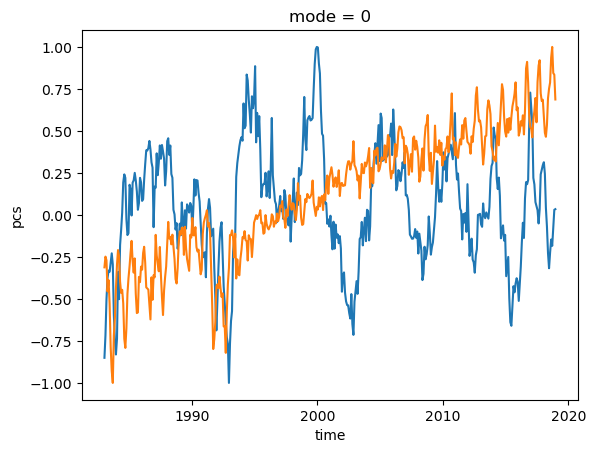

In [72]:
pc1.plot()
pc1_stand.plot()

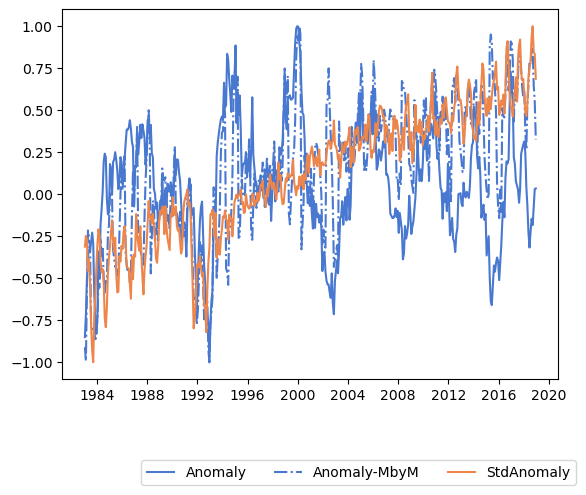

In [73]:
ax = plt.axes()
ax.plot(pc1_time, pc1, label='Anomaly', color=sns_colors[0])
ax.plot(pc1_time, pc1_month, label='Anomaly-MbyM', color=sns_colors[0], linestyle='-.')
ax.plot(pc1_time, pc1_stand, label='StdAnomaly', color=sns_colors[1])
# ax.plot(pc1_time, pc1_month_stand, label='StdAnomaly-MbyM', color=sns_colors[1], linestyle='-.')
# ax.plot(pc1_time, pc1_unforced, label='UnforceAnomaly', color=sns_colors[2])
# ax.plot(pc1_time, pc1_month_unforced, label='UnforceAnomaly-MbyM', color=sns_colors[2], linestyle='-.')
plt.legend(ncol=3, bbox_to_anchor=(1.05, -.2))

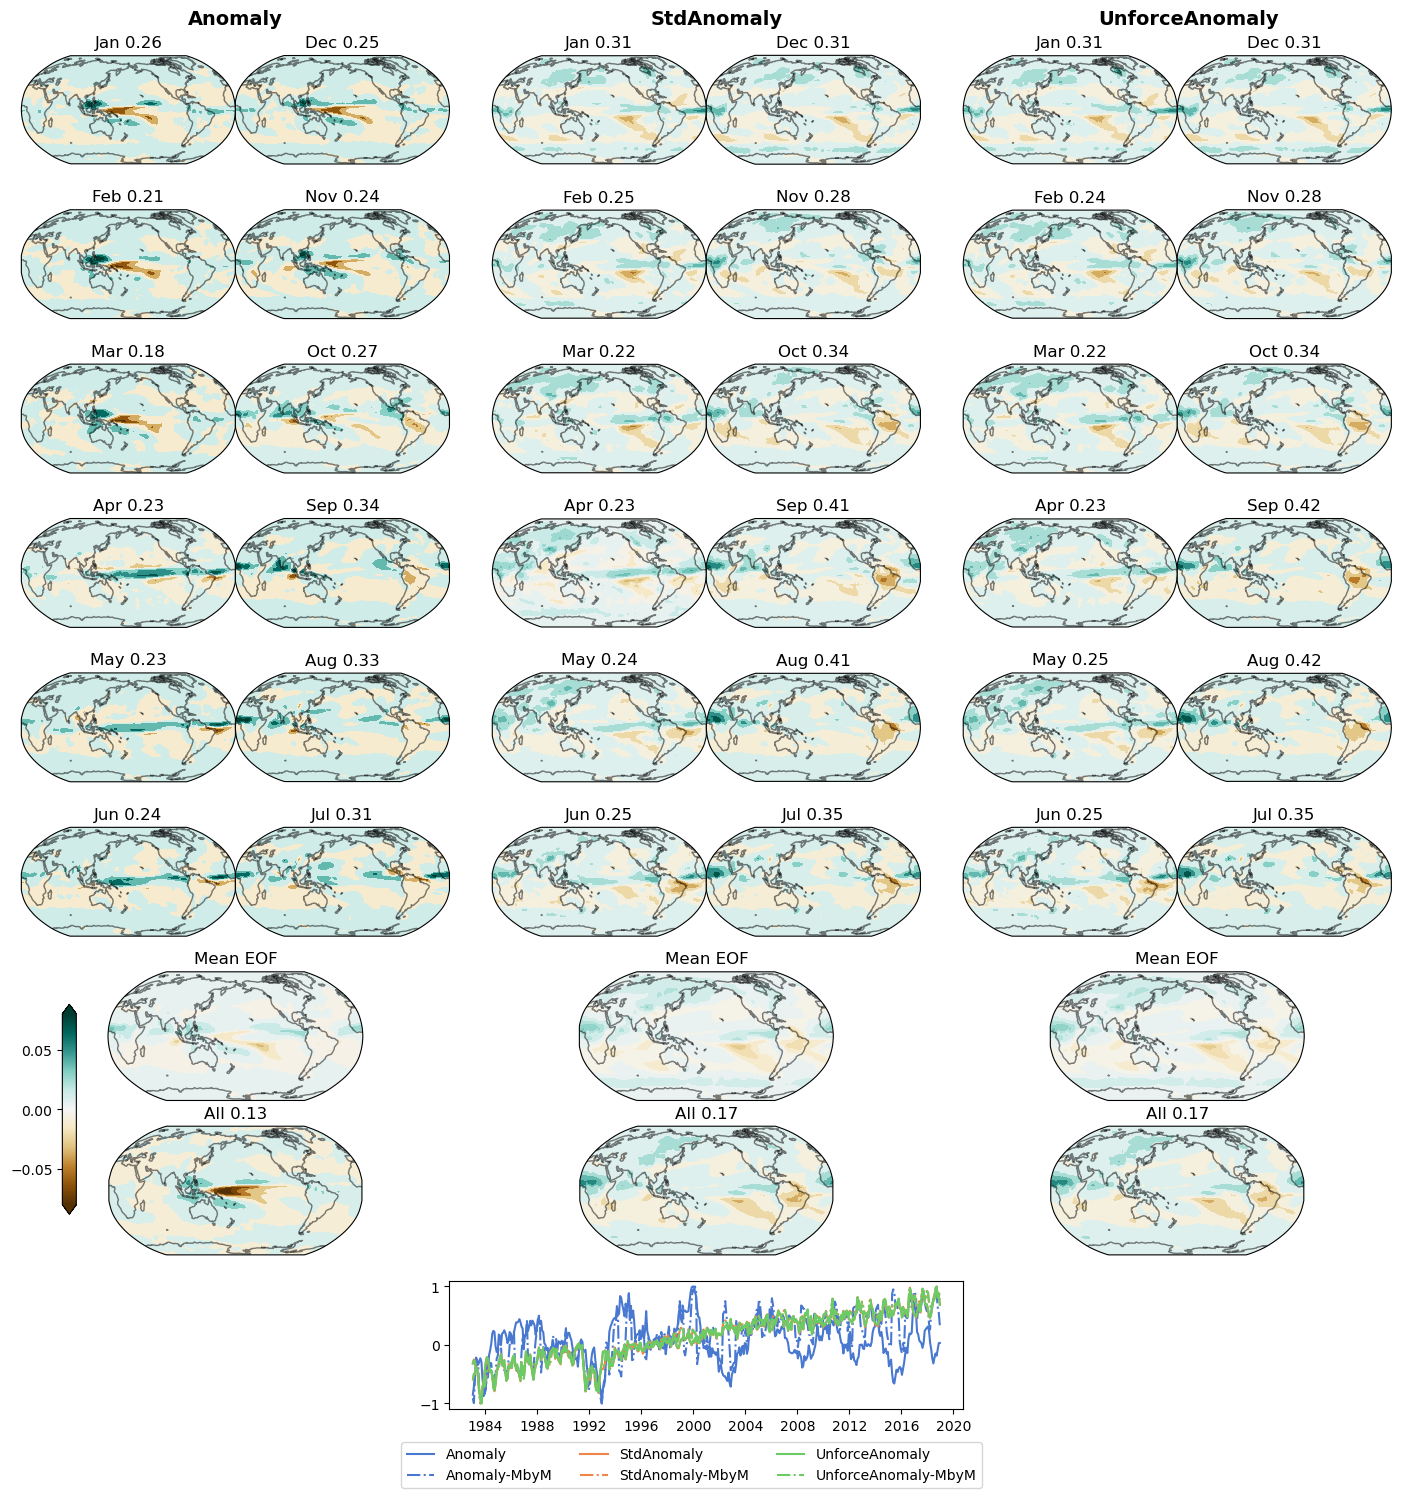

In [88]:
vmin = -0.08
vmax = 0.08
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
fig = plt.figure(figsize=(14, 14))
gs = GridSpec(9, 8, figure=fig, width_ratios=[1, 1, 0.2, 1, 1, 0.2, 1, 1])
ind = 0
plot_eofs(column=0, solver_list_month=solver_list_month, solver_list=solver_list, norm=norm, gs=gs, fig=fig)
plot_eofs(column=3, solver_list_month=solver_list_month_stand, solver_list=solver_list_stand, norm=norm, gs=gs, fig=fig)
plot_eofs(column=6, solver_list_month=solver_list_month_unforced, solver_list=solver_list_unforced, norm=norm, gs=gs, fig=fig)

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)
ax = fig.add_subplot(gs[8, 2:6])
ax.plot(pc1_time, pc1, label='Anomaly', color=sns_colors[0])
ax.plot(pc1_time, pc1_month, label='Anomaly-MbyM', color=sns_colors[0], linestyle='-.')
ax.plot(pc1_time, pc1_stand, label='StdAnomaly', color=sns_colors[1])
ax.plot(pc1_time, pc1_month_stand, label='StdAnomaly-MbyM', color=sns_colors[1], linestyle='-.')
ax.plot(pc1_time, pc1_unforced, label='UnforceAnomaly', color=sns_colors[2])
ax.plot(pc1_time, pc1_month_unforced, label='UnforceAnomaly-MbyM', color=sns_colors[2], linestyle='-.')
plt.legend(ncol=3, bbox_to_anchor=(1.05, -.2))
fig.text(x=0.13, y=1., s='Anomaly', fontsize=14, weight='bold')
fig.text(x=0.46, y=1., s='StdAnomaly', fontsize=14, weight='bold')
fig.text(x=0.78, y=1., s='UnforceAnomaly', fontsize=14, weight='bold')
cbar_ax = fig.add_axes([0.04, 0.15, 0.01, 0.15])
cb = fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap='BrBG'), cax=cbar_ax, extend='both')
cbar_ax.yaxis.set_ticks_position('left')
plt.savefig('pr-EOF-pc.png', dpi=180, bbox_inches='tight')

# SST

In [4]:
variable = 'tos'
eof_start = 1950
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-False-month-True-unforced-False-joint-False', 'rb') as pfile:
    solver_list_month = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-False-month-False-unforced-False-joint-False', 'rb') as pfile:
    solver_list = pickle.load(pfile)

In [5]:
variable = 'tos'
eof_start = 1950
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-True-unforced-False-joint-False', 'rb') as pfile:
    solver_list_month_stand = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-False-unforced-False-joint-False', 'rb') as pfile:
    solver_list_stand = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-True-unforced-True-joint-False', 'rb') as pfile:
    solver_list_month_unforced = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-False-unforced-True-joint-False', 'rb') as pfile:
    solver_list_unforced = pickle.load(pfile)

In [11]:
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1950_2022/ERSST/tos-metrics-stand-False-month-False-unforced-False-joint-False', 'rb') as pfile:
    metrics_ersst = pickle.load(pfile)
pc1 = metrics_ersst['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1950_2022/ERSST/tos-metrics-stand-False-month-True-unforced-False-joint-False', 'rb') as pfile:
    metrics_ersst_month = pickle.load(pfile)
pc1_month = metrics_ersst_month['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1950_2022/ERSST/tos-metrics-stand-True-month-True-unforced-False-joint-False', 'rb') as pfile:
    metrics_ersst_month_stand = pickle.load(pfile)
pc1_month_stand = metrics_ersst_month_stand['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1950_2022/ERSST/tos-metrics-stand-True-month-False-unforced-False-joint-False', 'rb') as pfile:
    metrics_ersst_stand = pickle.load(pfile)
pc1_stand = metrics_ersst_stand['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1950_2022/ERSST/tos-metrics-stand-True-month-False-unforced-True-joint-False', 'rb') as pfile:
    metrics_ersst_unforced = pickle.load(pfile)
pc1_unforced = metrics_ersst_unforced['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1950_2022/ERSST/tos-metrics-stand-True-month-True-unforced-True-joint-False', 'rb') as pfile:
    metrics_ersst_month_unforced = pickle.load(pfile)
pc1_month_unforced = metrics_ersst_month_unforced['pc']

In [17]:
pc1_month.time.data[0]
pc1_time = pc1_month.indexes['time'].to_datetimeindex()
sns_colors = sns.color_palette('muted', 3)
sns_colors

/var/tmp/shiduan/ipykernel_3988327/188138850.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  pc1_time = pc1_month.indexes['time'].to_datetimeindex()


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803)]

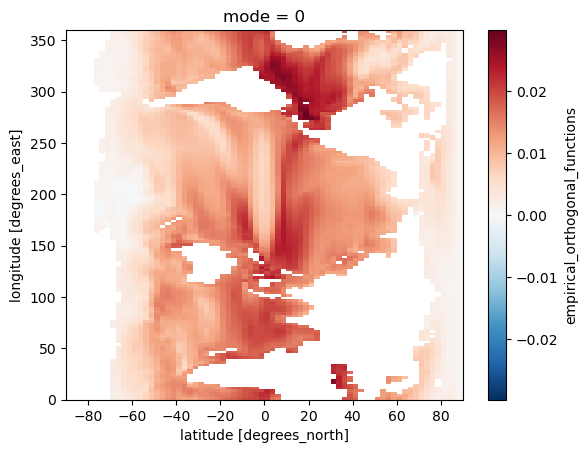

In [10]:
solver_list_unforced[0].eofs().isel(mode=0).plot()

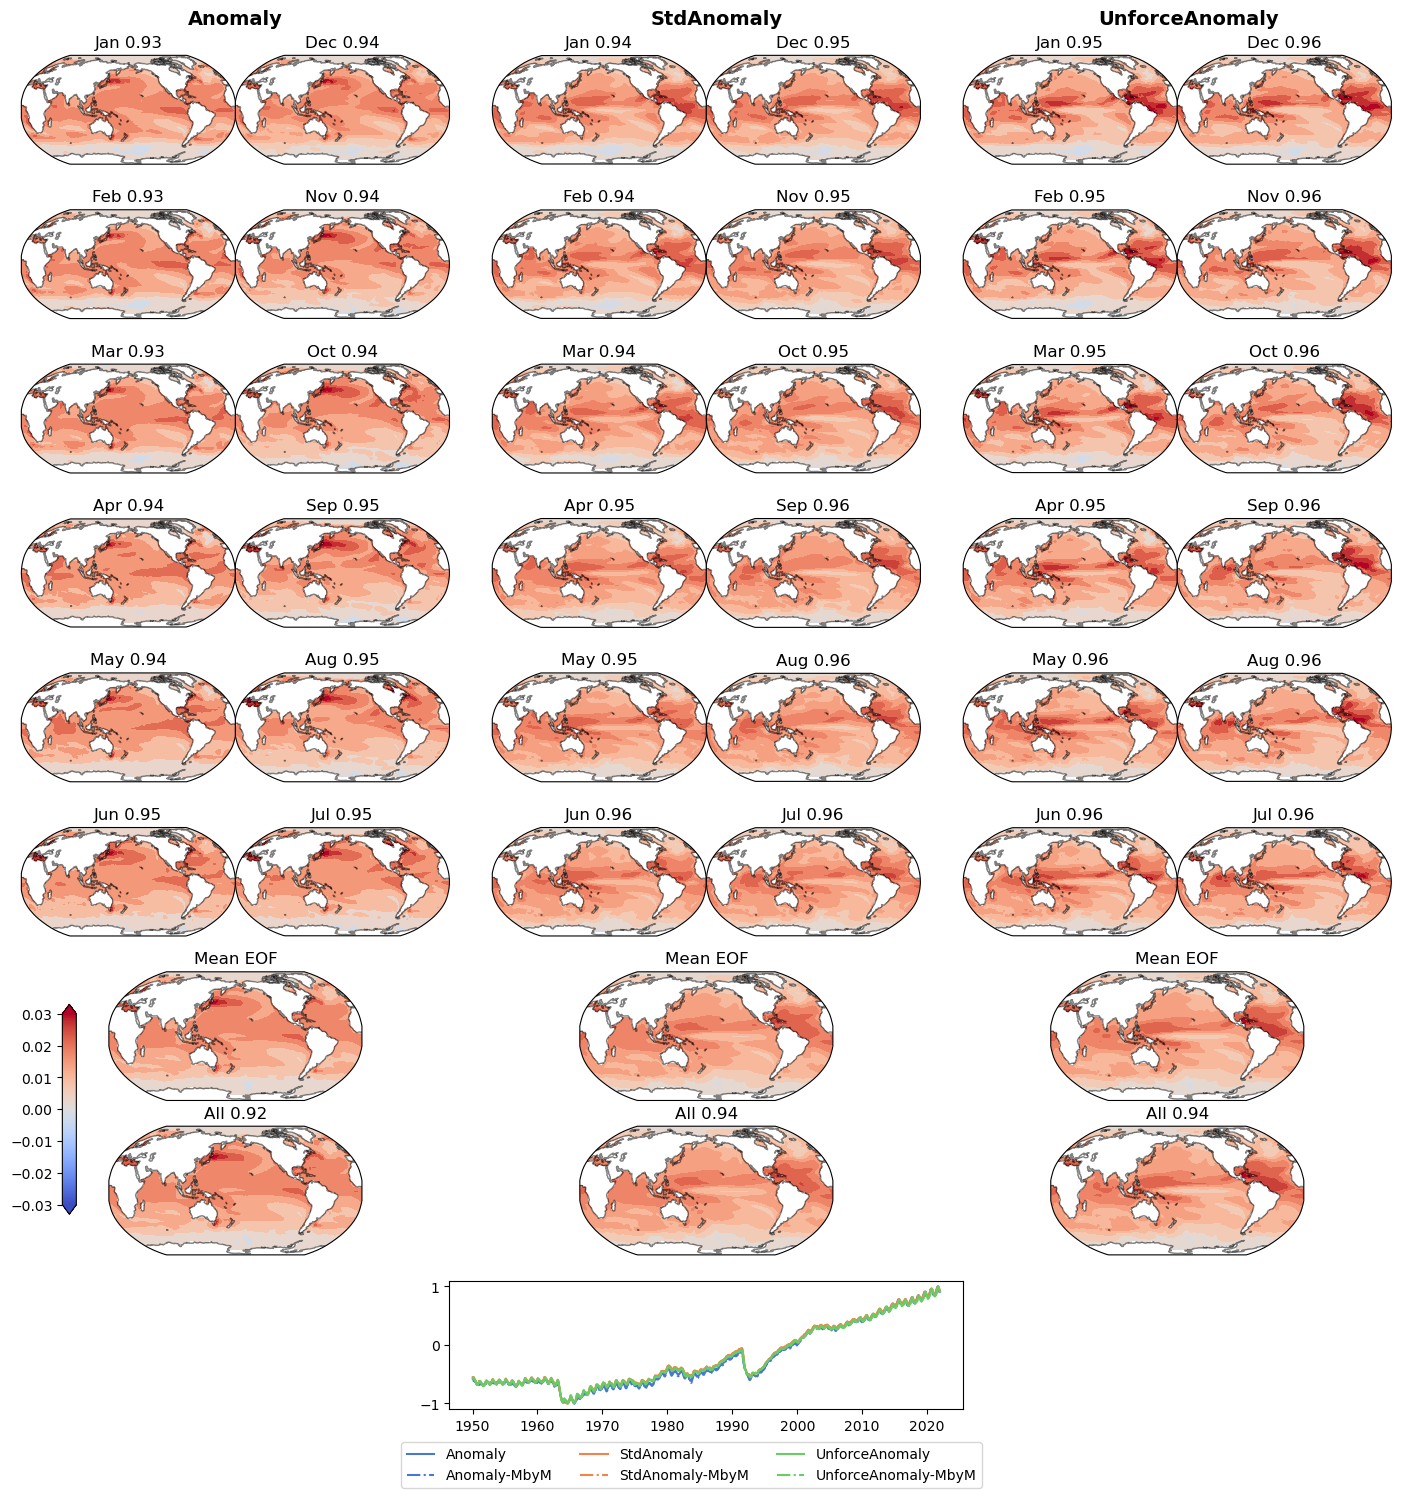

In [21]:
vmin = -0.03
vmax = 0.03
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
fig = plt.figure(figsize=(14, 14))
gs = GridSpec(9, 8, figure=fig, width_ratios=[1, 1, 0.2, 1, 1, 0.2, 1, 1])
ind = 0
plot_eofs(column=0, solver_list_month=solver_list_month, solver_list=solver_list, norm=norm, gs=gs, fig=fig, cmap='coolwarm')
plot_eofs(column=3, solver_list_month=solver_list_month_stand, solver_list=solver_list_stand, norm=norm, gs=gs, fig=fig, cmap='coolwarm')
plot_eofs(column=6, solver_list_month=solver_list_month_unforced, solver_list=solver_list_unforced, norm=norm, gs=gs, fig=fig, cmap='coolwarm')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)
ax = fig.add_subplot(gs[8, 2:6])
ax.plot(pc1_time, pc1, label='Anomaly', color=sns_colors[0])
ax.plot(pc1_time, pc1_month, label='Anomaly-MbyM', color=sns_colors[0], linestyle='-.')
ax.plot(pc1_time, pc1_stand, label='StdAnomaly', color=sns_colors[1])
ax.plot(pc1_time, pc1_month_stand, label='StdAnomaly-MbyM', color=sns_colors[1], linestyle='-.')
ax.plot(pc1_time, pc1_unforced, label='UnforceAnomaly', color=sns_colors[2])
ax.plot(pc1_time, pc1_month_unforced, label='UnforceAnomaly-MbyM', color=sns_colors[2], linestyle='-.')
plt.legend(ncol=3, bbox_to_anchor=(1.05, -.2))
fig.text(x=0.13, y=1., s='Anomaly', fontsize=14, weight='bold')
fig.text(x=0.46, y=1., s='StdAnomaly', fontsize=14, weight='bold')
fig.text(x=0.78, y=1., s='UnforceAnomaly', fontsize=14, weight='bold')
cbar_ax = fig.add_axes([0.04, 0.15, 0.01, 0.15])
cb = fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap='coolwarm'), cax=cbar_ax, extend='both')
cbar_ax.yaxis.set_ticks_position('left')
plt.savefig('tos-EOF-pc.png', dpi=180, bbox_inches='tight')

# Monmaxpr

In [22]:
variable = 'monmaxpr'
eof_start = 1979
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-False-month-True-unforced-False-joint-False', 'rb') as pfile:
    solver_list_month = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-False-month-False-unforced-False-joint-False', 'rb') as pfile:
    solver_list = pickle.load(pfile)

with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-True-unforced-False-joint-False', 'rb') as pfile:
    solver_list_month_stand = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-False-unforced-False-joint-False', 'rb') as pfile:
    solver_list_stand = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-True-unforced-True-joint-False', 'rb') as pfile:
    solver_list_month_unforced = pickle.load(pfile)
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/'+str(eof_start)+'_2022/'+variable+'-solver-stand-True-month-False-unforced-True-joint-False', 'rb') as pfile:
    solver_list_unforced = pickle.load(pfile)

In [23]:
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/monmaxpr-metrics-stand-False-month-False-unforced-False-joint-False', 'rb') as pfile:
    metric = pickle.load(pfile)
pc1 = metric['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/monmaxpr-metrics-stand-False-month-True-unforced-False-joint-False', 'rb') as pfile:
    metric = pickle.load(pfile)
pc1_month = metric['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/monmaxpr-metrics-stand-True-month-True-unforced-False-joint-False', 'rb') as pfile:
    metric = pickle.load(pfile)
pc1_month_stand = metric['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/monmaxpr-metrics-stand-True-month-False-unforced-False-joint-False', 'rb') as pfile:
    metric = pickle.load(pfile)
pc1_stand = metric['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/monmaxpr-metrics-stand-True-month-False-unforced-True-joint-False', 'rb') as pfile:
    metric = pickle.load(pfile)
pc1_unforced = metric['pc']
with open('/p/lustre2/shiduan/ForceSMIP/EOF/modes_all/1979_2022/MSWEP/monmaxpr-metrics-stand-True-month-True-unforced-True-joint-False', 'rb') as pfile:
    metric = pickle.load(pfile)
pc1_month_unforced = metric['pc']

In [24]:
pc1_month.time.data[0]
pc1_time = pc1_month.indexes['time'].to_datetimeindex()
sns_colors = sns.color_palette('muted', 3)
sns_colors

/var/tmp/shiduan/ipykernel_3988327/188138850.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  pc1_time = pc1_month.indexes['time'].to_datetimeindex()


[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803)]

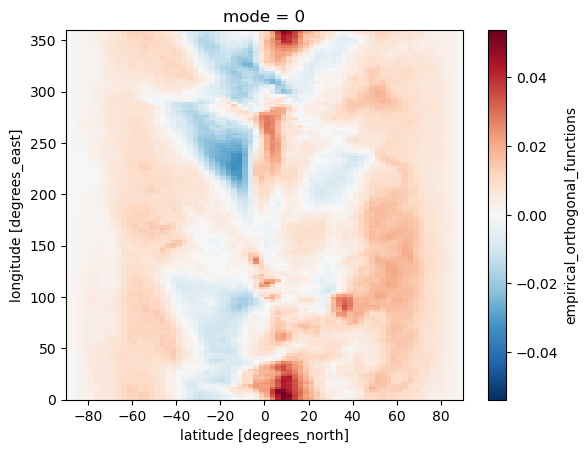

In [25]:
solver_list_unforced[0].eofs().isel(mode=0).plot()

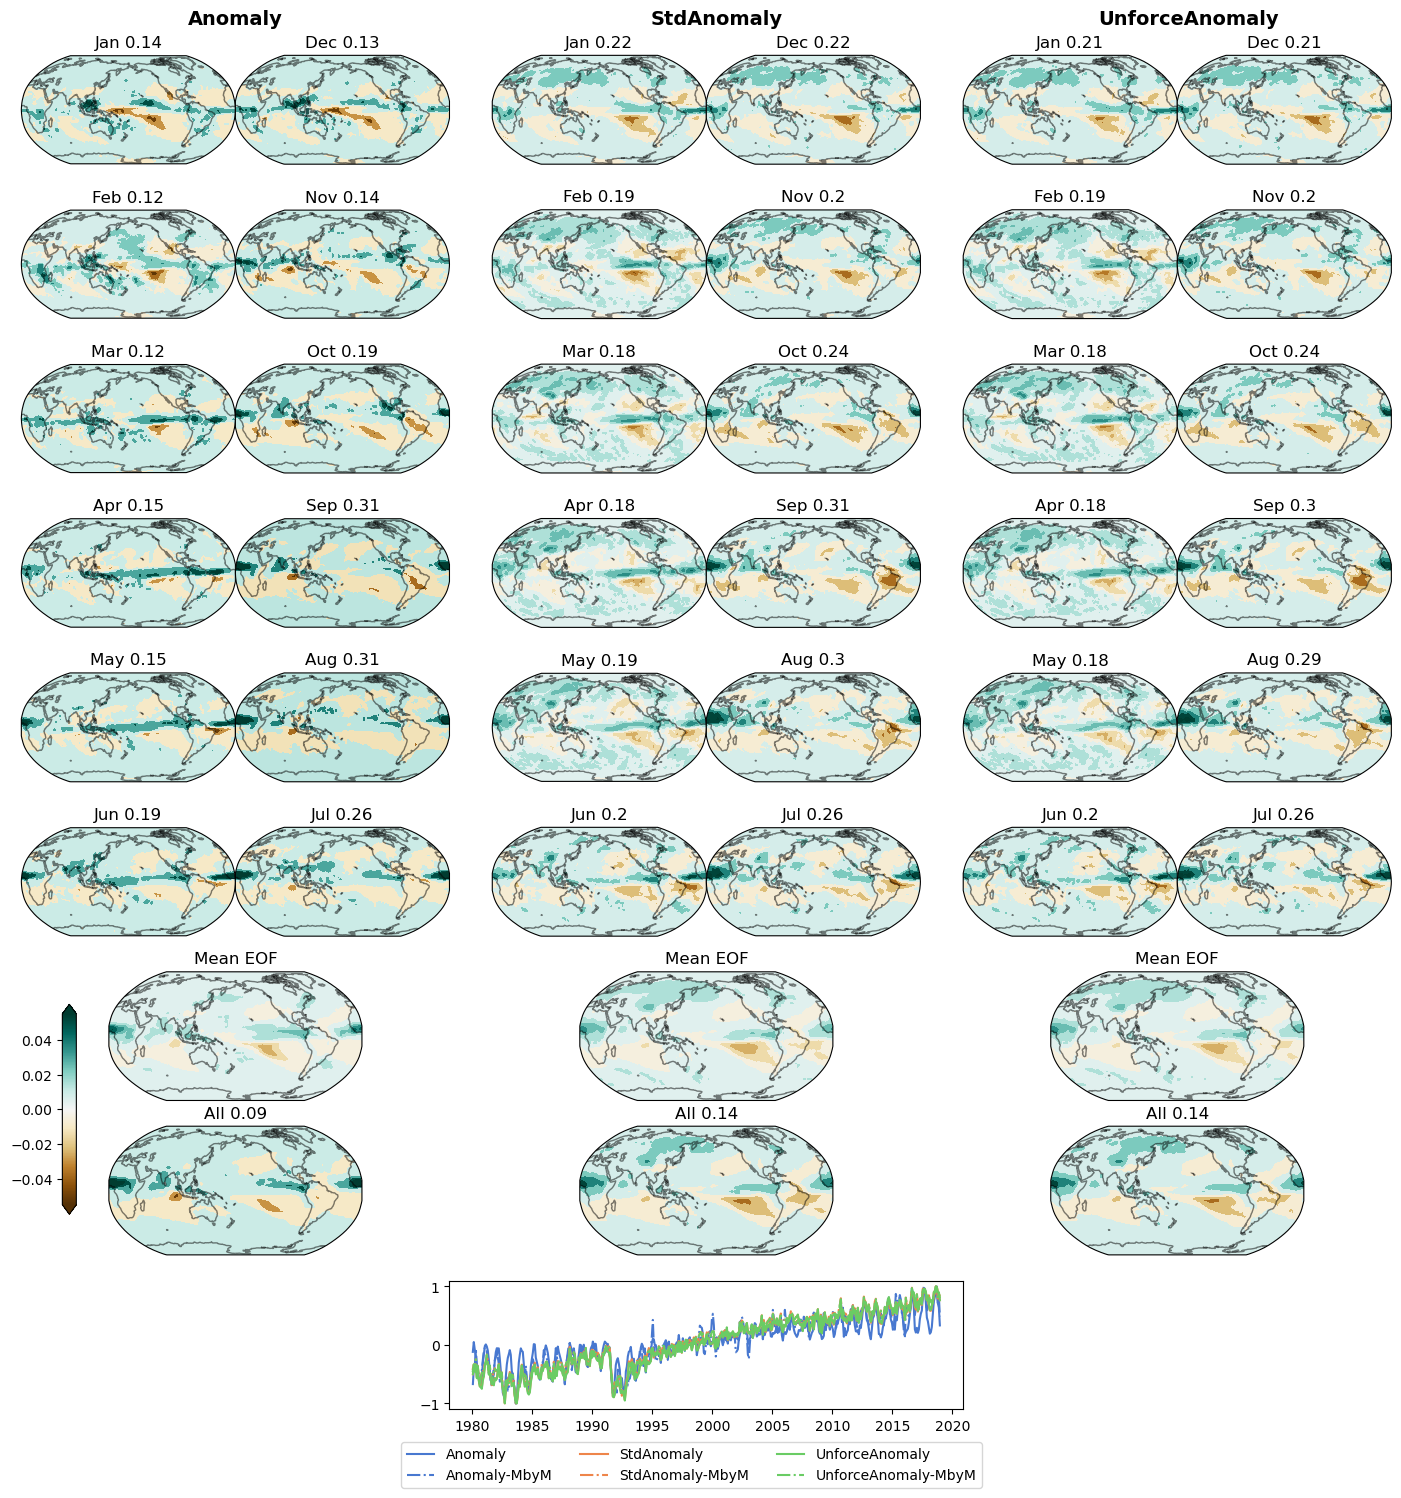

In [28]:
vmin = -0.055
vmax = 0.055
norm = colors.TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)
fig = plt.figure(figsize=(14, 14))
gs = GridSpec(9, 8, figure=fig, width_ratios=[1, 1, 0.2, 1, 1, 0.2, 1, 1])
ind = 0
plot_eofs(column=0, solver_list_month=solver_list_month, solver_list=solver_list, norm=norm, gs=gs, fig=fig, cmap='BrBG')
plot_eofs(column=3, solver_list_month=solver_list_month_stand, solver_list=solver_list_stand, norm=norm, gs=gs, fig=fig, cmap='BrBG')
plot_eofs(column=6, solver_list_month=solver_list_month_unforced, solver_list=solver_list_unforced, norm=norm, gs=gs, fig=fig, cmap='BrBG')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0.2)
ax = fig.add_subplot(gs[8, 2:6])
ax.plot(pc1_time, pc1, label='Anomaly', color=sns_colors[0])
ax.plot(pc1_time, pc1_month, label='Anomaly-MbyM', color=sns_colors[0], linestyle='-.')
ax.plot(pc1_time, pc1_stand, label='StdAnomaly', color=sns_colors[1])
ax.plot(pc1_time, pc1_month_stand, label='StdAnomaly-MbyM', color=sns_colors[1], linestyle='-.')
ax.plot(pc1_time, pc1_unforced, label='UnforceAnomaly', color=sns_colors[2])
ax.plot(pc1_time, pc1_month_unforced, label='UnforceAnomaly-MbyM', color=sns_colors[2], linestyle='-.')
plt.legend(ncol=3, bbox_to_anchor=(1.05, -.2))
fig.text(x=0.13, y=1., s='Anomaly', fontsize=14, weight='bold')
fig.text(x=0.46, y=1., s='StdAnomaly', fontsize=14, weight='bold')
fig.text(x=0.78, y=1., s='UnforceAnomaly', fontsize=14, weight='bold')
cbar_ax = fig.add_axes([0.04, 0.15, 0.01, 0.15])
cb = fig.colorbar(mappable=mpl.cm.ScalarMappable(norm=norm, cmap='BrBG'), cax=cbar_ax, extend='both')
cbar_ax.yaxis.set_ticks_position('left')
plt.savefig('monmaxpr-EOF-pc.png', dpi=180, bbox_inches='tight')